In [1]:
import os

# List contents of /kaggle/input/
input_dir = '/kaggle/input'
print(os.listdir(input_dir))


['eeg-schizo']


In [2]:
# List the contents of the 'eeg-schizo' folder
eeg_folder_path = '/kaggle/input/eeg-schizo'
print("Contents of eeg-schizo folder:", os.listdir(eeg_folder_path))


Contents of eeg-schizo folder: ['MSU']


In [3]:
# List the contents of the MSU folder
msu_folder_path = '/kaggle/input/eeg-schizo/MSU'
print("Contents of MSU folder:", os.listdir(msu_folder_path))


Contents of MSU folder: ['schizophrenic', 'healthy']


In [4]:
import os
import numpy as np
import mne
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the path to the MSU dataset
dataset_path = '/kaggle/input/eeg-schizo/MSU'

# Function to apply bandpass filtering
def bandpass_filter(raw, l_freq=1.0, h_freq=40.0):
    return raw.filter(l_freq=l_freq, h_freq=h_freq, fir_design='firwin')

# Function to segment data into windows 
def segment_data(eeg_data, window_size, overlap):
    step = int(window_size * (1 - overlap))  # Calculate step size
    windows = []
    for start in range(0, len(eeg_data) - window_size + 1, step):
        windows.append(eeg_data[start:start + window_size])
    return np.array(windows)

# Feature extraction (mean, standard deviation, and spectral entropy)
def extract_features(eeg_data, sfreq):
    # Mean and standard deviation across channels
    mean_features = np.mean(eeg_data, axis=0)
    std_features = np.std(eeg_data, axis=0)

    # Spectral entropy
    psd, _ = mne.time_frequency.psd_array_multitaper(eeg_data.T, sfreq=sfreq, fmin=1, fmax=40, verbose=False)
    psd_norm = psd / np.sum(psd, axis=0, keepdims=True)
    spectral_entropy = -np.sum(psd_norm * np.log(psd_norm), axis=0)

    return np.concatenate([mean_features, std_features, spectral_entropy])

# Function to load and preprocess .edf files
def load_preprocessed_data(folder_path, label, sfreq, window_size, overlap):
    data = []
    labels = []
    for file in os.listdir(folder_path):
        if file.endswith('.edf'):
            file_path = os.path.join(folder_path, file)
            raw = mne.io.read_raw_edf(file_path, preload=True)
            raw.pick_types(eeg=True)  # Select EEG channels only

            # Bandpass filter
            raw = bandpass_filter(raw)

            # Get EEG data
            eeg_data = raw.get_data().T  # Transpose to (samples, channels)

            # Segment data into windows
            windows = segment_data(eeg_data, window_size, overlap)

            # Extract features for each window
            features = [extract_features(window, sfreq) for window in windows]
            data.extend(features)
            labels.extend([label] * len(features))
    return np.array(data), np.array(labels)

# Parameters for preprocessing
sampling_frequency = 128  
window_size = int(2 * sampling_frequency)  # 2 seconds window
overlap = 0.55  

# Load and preprocess data
healthy_path = os.path.join(dataset_path, 'healthy')
schizophrenic_path = os.path.join(dataset_path, 'schizophrenic')

healthy_data, healthy_labels = load_preprocessed_data(healthy_path, label=0, sfreq=sampling_frequency,
                                                      window_size=window_size, overlap=overlap)
schizophrenic_data, schizophrenic_labels = load_preprocessed_data(schizophrenic_path, label=1, sfreq=sampling_frequency,
                                                                  window_size=window_size, overlap=overlap)

# Combine the data
X = np.concatenate([healthy_data, schizophrenic_data], axis=0)
y = np.concatenate([healthy_labels, schizophrenic_labels], axis=0)

# Normalize each sample
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 226249  =      0.000 ...   904.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 241249  =      0.000 ...   964.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 278749  =      0.000 ...  1114.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 216249  =      0.000 ...   864.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 224999  =      0.000 ...   899.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 236249  =      0.000 ...   944.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 228749  =      0.000 ...   914.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/healthy/h06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 232499  =      0.000 ...   929.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 212499  =      0.000 ...   849.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227749  =      0.000 ...   910.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 184999  =      0.000 ...   739.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211249  =      0.000 ...   844.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 296249  =      0.000 ...  1184.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 222499  =      0.000 ...   889.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 286249  =      0.000 ...  1144.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 336499  =      0.000 ...  1345.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 542499  =      0.000 ...  2169.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 283749  =      0.000 ...  1134.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 301249  =      0.000 ...  1204.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 339999  =      0.000 ...  1359.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 240999  =      0.000 ...   963.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting EDF parameters from /kaggle/input/eeg-schizo/MSU/schizophrenic/s12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 271749  =      0.000 ...  1086.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Reshape for CNN input (samples, timepoints, channels, 1)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (50159, 117, 1), Test shape: (12540, 117, 1)


**CHANNEL ATTENTION**

In [23]:
# Import necessary libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Layer, GlobalAveragePooling2D, GlobalMaxPooling2D, Multiply, Add, Reshape, Activation, Bidirectional, GRU, PReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import seaborn as sns
from keras.regularizers import l2

# Define Channel Attention Layer
class ChannelAttention(Layer):
    def __init__(self, filters, reduction_ratio=16, **kwargs):
        super(ChannelAttention, self).__init__(**kwargs)
        self.filters = filters
        self.reduction_ratio = reduction_ratio
        self.global_avg_pool = GlobalAveragePooling2D()
        self.global_max_pool = GlobalMaxPooling2D()
        self.dense1 = Dense(filters // reduction_ratio, activation='relu')
        self.dense2 = Dense(filters, activation='sigmoid')

    def call(self, inputs):
        avg_pool = self.global_avg_pool(inputs)
        avg_pool = self.dense1(avg_pool)
        avg_pool = self.dense2(avg_pool)

        max_pool = self.global_max_pool(inputs)
        max_pool = self.dense1(max_pool)
        max_pool = self.dense2(max_pool)

        combined = Add()([avg_pool, max_pool])
        combined = tf.expand_dims(combined, axis=1)
        combined = tf.expand_dims(combined, axis=2)

        return Multiply()([inputs, combined])

    def get_config(self):
        config = super(ChannelAttention, self).get_config()
        config.update({
            "filters": self.filters,
            "reduction_ratio": self.reduction_ratio
        })
        return config

# Define Model Framework
class ProposedModelFramework:
    def __init__(self, classes, input_shape):
        self.classes = classes
        self.input_shape = (input_shape[0], input_shape[1], 1)  # Add channel dimension
        self.model = Sequential()

        # CNN layers with PReLU activation
        self.model.add(Conv2D(32, (3, 1), input_shape=self.input_shape))
        self.model.add(PReLU())
        self.model.add(Conv2D(32, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))
        self.model.add(Dropout(0.3))
        
        self.model.add(Conv2D(64, (3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(64, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))
        self.model.add(Dropout(0.3))

        self.model.add(Conv2D(128, (3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(128, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))

        # Flatten layer to prepare for BiGRU
        self.model.add(Flatten())
        # Reshape to fit Bigru input shape
        self.model.add(Reshape((-1, 128)))

        # Apply BiGRU layer before Channel Attention
        self.model.add(Bidirectional(GRU(128, return_sequences=True)))

        # Reshape before Channel Attention to add a channel dimension
        self.model.add(Reshape((-1, 1, 128)))
        # Apply Channel Attention
        self.model.add(ChannelAttention(filters=128))

        # Reshape after Channel Attention back to 3D
        self.model.add(Reshape((-1, 128)))

        # Flatten before Dense layers
        self.model.add(Flatten())

        # Dense layers with PReLU activation
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(256))
        self.model.add(PReLU())
        self.model.add(Dropout(0.5))

        # Final Classification Layer
        self.model.add(Dense(1, activation='sigmoid'))

    def train(self, X_train, y_train, epochs, batch_size, validation_split):
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
        history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                 validation_split=validation_split, callbacks=[early_stopping, lr_scheduler])
        return history

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

    def display_summary(self):
        print("\nModel Summary:")
        self.model.summary()

# Example Usage 
input_shape = (X_train.shape[1], X_train.shape[2])  # Define shape
model = ProposedModelFramework(classes=1, input_shape=input_shape)
model.display_summary()



Model Summary:


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_106 (Conv2D)                  │ (None, 115, 1, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_170 (PReLU)                  │ (None, 115, 1, 32)          │           3,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_107 (Conv2D)                  │ (None, 113, 1, 32)          │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_171 (PReLU)                  │ (None, 113, 1, 32)          │           3,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 56, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 56, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_108 (Conv2D)                  │ (None, 54, 1, 64)           │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_172 (PReLU)                  │ (None, 54, 1, 64)           │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_109 (Conv2D)                  │ (None, 52, 1, 64)           │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_173 (PReLU)                  │ (None, 52, 1, 64)           │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 26, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 26, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_110 (Conv2D)                  │ (None, 24, 1, 128)          │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_174 (PReLU)                  │ (None, 24, 1, 128)          │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_111 (Conv2D)                  │ (None, 22, 1, 128)          │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_175 (PReLU)                  │ (None, 22, 1, 128)          │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 11, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_34 (Flatten)                 │ (None, 1408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_35 (Reshape)                 │ (None, 11, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_17 (Bidirectional)     │ (None, 11, 256)             │         198,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_36 (Reshape)                 │ (None, 22, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 743,593 (2.84 MB)

 Trainable params: 743,593 (2.84 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.7289 - loss: 0.5080 - val_accuracy: 0.9331 - val_loss: 0.1663 - learning_rate: 0.0010
Epoch 2/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9173 - loss: 0.2071 - val_accuracy: 0.9474 - val_loss: 0.1274 - learning_rate: 0.0010
Epoch 3/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9418 - loss: 0.1513 - val_accuracy: 0.9561 - val_loss: 0.1131 - learning_rate: 0.0010
Epoch 4/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9488 - loss: 0.1359 - val_accuracy: 0.9649 - val_loss: 0.0956 - learning_rate: 0.0010
Epoch 5/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9579 - loss: 0.1153 - val_accuracy: 0.9694 - val_loss: 0.0830 - learning_rate: 0.0010
Epoch 6/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9577 - loss: 0.1104 - val_accuracy: 0.9662 - val_loss: 0.0907 - learning_rate: 0.0010
Epoch 7/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9616 - 

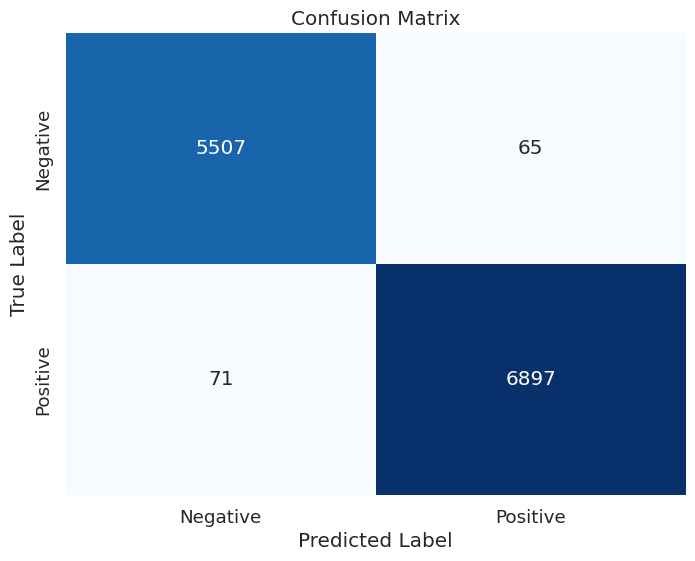

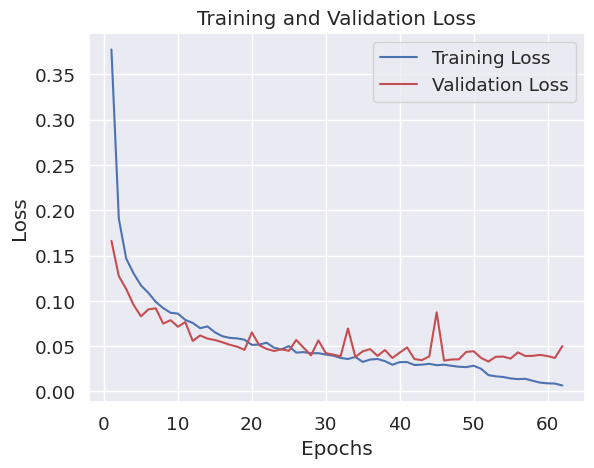

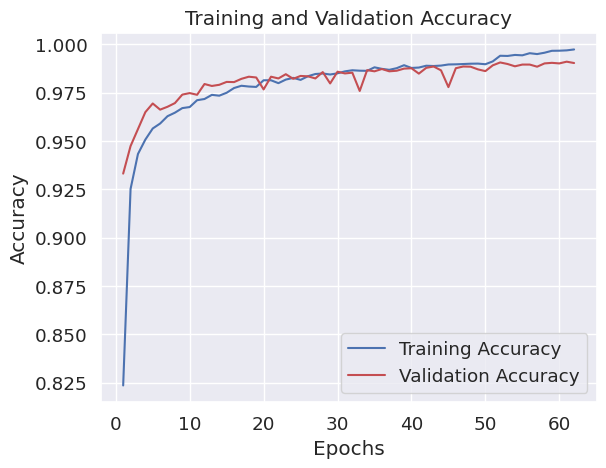

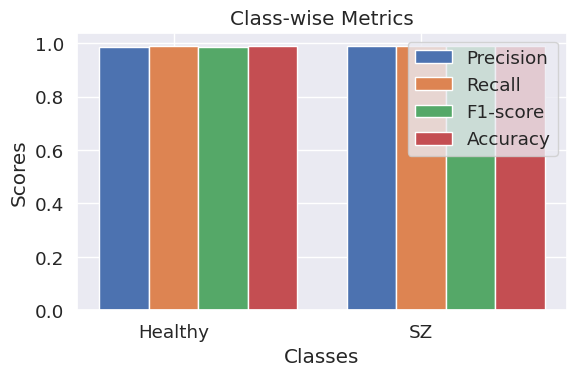

Training Accuracy: 99.74%
Validation Accuracy: 99.03%
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9887 - loss: 0.0436
Testing Accuracy: 98.92%
Precision: 99.07%
Recall: 98.98%
F1-Score: 99.02%


In [24]:
import matplotlib.pyplot as plt

def plot_class_wise_metric(classes, y_test, y_pred_classes):
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average=None)
    accuracy = accuracy_score(y_test, y_pred_classes)
    class_labels = ['Healthy', 'SZ']

    # Define metrics to plot
    metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
    classwise_metrics = [precision, recall, f1_score, [accuracy] * len(precision)]

    # Plot bar graph
    fig, ax = plt.subplots(figsize=(6, 4))

    index = np.arange(len(class_labels))
    bar_width = 0.2
    opacity = 0.8

    for i, metric in enumerate(metrics):
        ax.bar(index + i * bar_width, classwise_metrics[i], bar_width, label=metric)

    ax.set_xlabel('Classes')
    ax.set_ylabel('Scores')
    ax.set_title('Class-wise Metrics')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(class_labels)
    ax.legend()

    plt.tight_layout()
    plt.savefig(f'{classes}_rimli_bar_graph.png')
    plt.show()

def plot_loss_curve(history, classes):
    # Access loss and accuracy from training history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    # Plot loss vs epoch
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'{classes}_rimli_loss_curve.png')
    plt.show()

    # Plot accuracy vs epoch
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'{classes}_rimli_accuracy.png')
    plt.show()

def plot_confusion_matrix(y_test, y_pred_classes):
    cm = confusion_matrix(y_test, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set_theme(font_scale=1.2)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'], cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def metric_values(model, y_pred_classes, X_test, y_test):
    accuracy = model.evaluate(X_test, y_test)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='weighted')
    print("Accuracy:", accuracy*100, "%")
    print("Precision:", precision*100, "%")
    print("Recall:", recall*100, "%")
    print("F1-score:", f1_score*100, "%")

# Model evaluation 
def evaluate_model(X_train, y_train, X_test, y_test, input_shape, epochs=100, batch_size=64):
    # Normalize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

    # Create and train the model
    model = ProposedModelFramework(2, input_shape)
    history = model.train(X_train, y_train, epochs, batch_size, validation_split=0.2)

    # Evaluate on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int).flatten()

    # Metrics and plots
    plot_confusion_matrix(y_test, y_pred_classes)
    plot_loss_curve(history, "Healthy vs Schizophrenic")
    plot_class_wise_metric("Healthy vs Schizophrenic", y_test, y_pred_classes)

    # Training and validation accuracy from history
    train_accuracy = history.history['accuracy'][-1]  # Last epoch's training accuracy
    val_accuracy = history.history['val_accuracy'][-1]  # Last epoch's validation accuracy

    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

    # Evaluate model on test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

    # Calculate precision, recall, and F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='binary')
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-Score: {f1_score * 100:.2f}%")

# Perform model evaluation once
input_shape = (X_train.shape[1], X_train.shape[2])
epochs = 100
batch_size = 64
evaluate_model(X_train, y_train, X_test, y_test, input_shape, epochs, batch_size)


**SELF ATTENTION**

In [11]:
# Import necessary libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Layer, GlobalAveragePooling2D, GlobalMaxPooling2D, Multiply, Add, Reshape, Activation, Bidirectional, GRU, PReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import seaborn as sns
from keras.regularizers import l2

# Define Self-Attention Layer
class SelfAttention(Layer):
    def __init__(self, filters=128, **kwargs):
        super(SelfAttention, self).__init__(**kwargs)
        self.filters = filters
        self.query_dense = Dense(filters)
        self.key_dense = Dense(filters)
        self.value_dense = Dense(filters)
        self.softmax = Activation('softmax')

    def call(self, inputs):
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)
        attention_scores = tf.matmul(query, key, transpose_b=True)
        attention_weights = self.softmax(attention_scores)
        attention_output = tf.matmul(attention_weights, value)
        return attention_output

    def get_config(self):
        config = super(SelfAttention, self).get_config()
        config.update({"filters": self.filters})
        return config

# Define Model Framework
class ProposedModelFramework:
    def __init__(self, classes, input_shape):
        self.classes = classes
        self.input_shape = (input_shape[0], input_shape[1], 1)  # Add channel dimension
        self.model = Sequential()

        # CNN layers with PReLU activation
        self.model.add(Conv2D(32, (3, 1), input_shape=self.input_shape))
        self.model.add(PReLU())
        self.model.add(Conv2D(32, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))
        self.model.add(Dropout(0.3))
        
        self.model.add(Conv2D(64, (3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(64, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))
        self.model.add(Dropout(0.3))

        self.model.add(Conv2D(128, (3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(128, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))

        # Flatten layer to prepare for BiGRU
        self.model.add(Flatten())
        # Reshape to fit BiGRU input shape
        self.model.add(Reshape((-1, 128)))

        # Apply BiGRU layer before Self-Attention
        self.model.add(Bidirectional(GRU(128, return_sequences=True)))

        # Apply Self-Attention
        self.model.add(SelfAttention(filters=128))

        # Flatten before Dense layers
        self.model.add(Flatten())

        # Dense layers with PReLU activation
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(256))
        self.model.add(PReLU())
        self.model.add(Dropout(0.5))

        # Final Classification Layer
        self.model.add(Dense(1, activation='sigmoid'))

    def train(self, X_train, y_train, epochs, batch_size, validation_split):
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
        history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                 validation_split=validation_split, callbacks=[early_stopping, lr_scheduler])
        return history

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

    def display_summary(self):
        print("\nModel Summary:")
        self.model.summary()

# Example Usage 
input_shape = (X_train.shape[1], X_train.shape[2])  # Define shape
model = ProposedModelFramework(classes=1, input_shape=input_shape)
model.display_summary()



Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 115, 1, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_50 (PReLU)                   │ (None, 115, 1, 32)          │           3,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 113, 1, 32)          │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_51 (PReLU)                   │ (None, 113, 1, 32)          │           3,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 56, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 56, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 54, 1, 64)           │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_52 (PReLU)                   │ (None, 54, 1, 64)           │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 52, 1, 64)           │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_53 (PReLU)                   │ (None, 52, 1, 64)           │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 26, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 26, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 24, 1, 128)          │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_54 (PReLU)                   │ (None, 24, 1, 128)          │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 22, 1, 128)          │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_55 (PReLU)                   │ (None, 22, 1, 128)          │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 11, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 1408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_13 (Reshape)                 │ (None, 11, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 11, 256)             │         198,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ self_attention_1 (SelfAttention)     │ (None, 11, 128)             │          98,688 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 659,873 (2.52 MB)

 Trainable params: 659,873 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.7056 - loss: 0.5368 - val_accuracy: 0.9272 - val_loss: 0.1809 - learning_rate: 0.0010
Epoch 2/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9224 - loss: 0.1993 - val_accuracy: 0.9382 - val_loss: 0.1594 - learning_rate: 0.0010
Epoch 3/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9364 - loss: 0.1644 - val_accuracy: 0.9469 - val_loss: 0.1377 - learning_rate: 0.0010
Epoch 4/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9460 - loss: 0.1439 - val_accuracy: 0.9528 - val_loss: 0.1169 - learning_rate: 0.0010
Epoch 5/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9509 - loss: 0.1311 - val_accuracy: 0.9658 - val_loss: 0.0914 - learning_rate: 0.0010
Epoch 6/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9565 - loss: 0.1166 - val_accuracy: 0.9685 - val_loss: 0.0860 - learning_rate: 0.0010
Epoch 7/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9601 - 

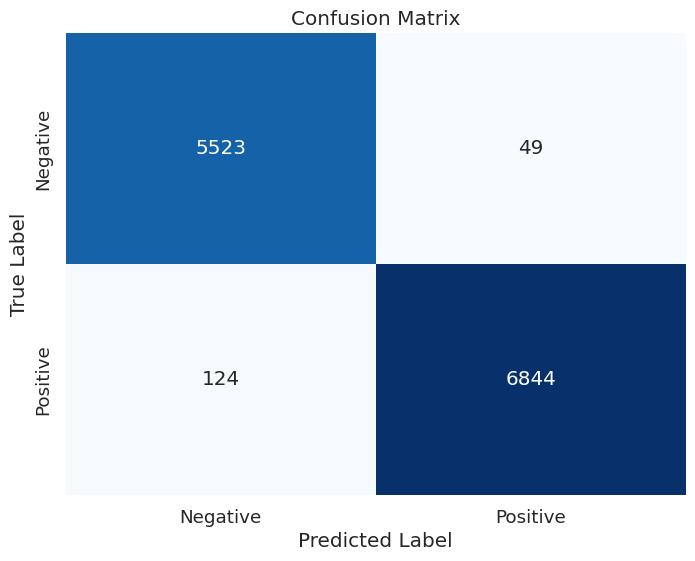

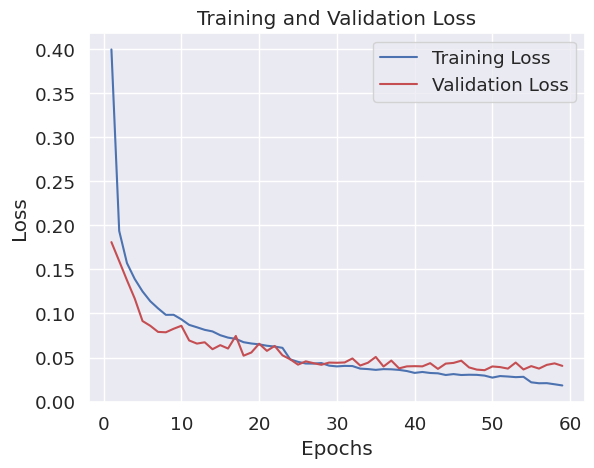

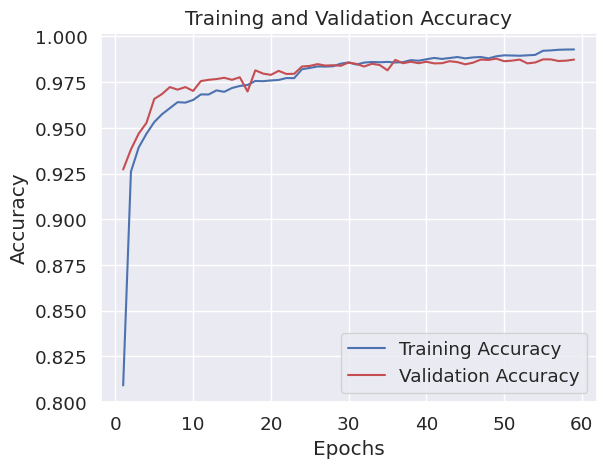

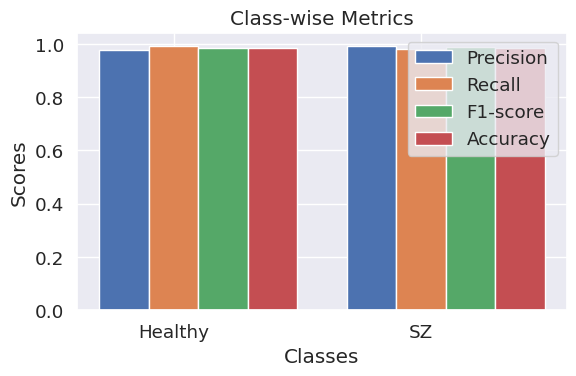

Training Accuracy: 99.29%
Validation Accuracy: 98.73%
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9860 - loss: 0.0425
Testing Accuracy: 98.62%
Precision: 99.29%
Recall: 98.22%
F1-Score: 98.75%


In [13]:
def plot_class_wise_metric(classes, y_test, y_pred_classes):
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average=None)
    accuracy = accuracy_score(y_test, y_pred_classes)
    class_labels = ['Healthy', 'SZ']

    # Define metrics to plot
    metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
    classwise_metrics = [precision, recall, f1_score, [accuracy] * len(precision)]

    # Plot bar graph
    fig, ax = plt.subplots(figsize=(6, 4))

    index = np.arange(len(class_labels))
    bar_width = 0.2
    opacity = 0.8

    for i, metric in enumerate(metrics):
        ax.bar(index + i * bar_width, classwise_metrics[i], bar_width, label=metric)

    ax.set_xlabel('Classes')
    ax.set_ylabel('Scores')
    ax.set_title('Class-wise Metrics')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(class_labels)
    ax.legend()

    plt.tight_layout()
    plt.savefig(f'{classes}_rimli_bar_graph.png')
    plt.show()

def plot_loss_curve(history, classes):
    # Access loss and accuracy from training history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    # Plot loss vs epoch
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'{classes}_rimli_loss_curve.png')
    plt.show()

    # Plot accuracy vs epoch
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'{classes}_rimli_accuracy.png')
    plt.show()

def plot_confusion_matrix(y_test, y_pred_classes):
    cm = confusion_matrix(y_test, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set_theme(font_scale=1.2)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'], cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def metric_values(model, y_pred_classes, X_test, y_test):
    accuracy = model.evaluate(X_test, y_test)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='weighted')
    print("Accuracy:", accuracy*100, "%")
    print("Precision:", precision*100, "%")
    print("Recall:", recall*100, "%")
    print("F1-score:", f1_score*100, "%")

# Model evaluation 
def evaluate_model(X_train, y_train, X_test, y_test, input_shape, epochs=100, batch_size=64):
    # Normalize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

    # Create and train the model
    model = ProposedModelFramework(2, input_shape)
    history = model.train(X_train, y_train, epochs, batch_size, validation_split=0.2)

    # Evaluate on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int).flatten()

    # Metrics and plots
    plot_confusion_matrix(y_test, y_pred_classes)
    plot_loss_curve(history, "Healthy vs Schizophrenic")
    plot_class_wise_metric("Healthy vs Schizophrenic", y_test, y_pred_classes)

    # Training and validation accuracy from history
    train_accuracy = history.history['accuracy'][-1]  # Last epoch's training accuracy
    val_accuracy = history.history['val_accuracy'][-1]  # Last epoch's validation accuracy

    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

    # Evaluate model on test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

    # Calculate precision, recall, and F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='binary')
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-Score: {f1_score * 100:.2f}%")

# Perform model evaluation once
input_shape = (X_train.shape[1], X_train.shape[2])
epochs = 100
batch_size = 64
evaluate_model(X_train, y_train, X_test, y_test, input_shape, epochs, batch_size)


**SPATIAL ATTENTION**

In [15]:
# Import necessary libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Layer, GlobalAveragePooling2D, GlobalMaxPooling2D, Multiply, Add, Reshape, Activation, Bidirectional, GRU, PReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import seaborn as sns
from keras.regularizers import l2

# Define Spatial Attention Layer
class SpatialAttention(Layer):
    def __init__(self, filters, **kwargs):
        super(SpatialAttention, self).__init__(**kwargs)
        self.filters = filters
        self.conv = Conv2D(filters, kernel_size=(1, 1), activation='sigmoid')  

    def call(self, inputs):
        attention = self.conv(inputs)
        return Multiply()([inputs, attention])

    def get_config(self):
        config = super(SpatialAttention, self).get_config()
        config.update({
            "filters": self.filters
        })
        return config
        
# Define Model Framework
class ProposedModelFramework:
    def __init__(self, classes, input_shape):
        self.classes = classes
        self.input_shape = (input_shape[0], input_shape[1], 1)  # Add channel dimension
        self.model = Sequential()

        # CNN layers with PReLU activation
        self.model.add(Conv2D(32, (3, 1), input_shape=self.input_shape))
        self.model.add(PReLU())
        self.model.add(Conv2D(32, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))
        self.model.add(Dropout(0.3))
        
        self.model.add(Conv2D(64, (3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(64, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))
        self.model.add(Dropout(0.3))

        self.model.add(Conv2D(128, (3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(128, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))

        # Flatten layer to prepare for BiGRU
        self.model.add(Flatten())
        # Reshape to fit Bigru input shape
        self.model.add(Reshape((-1, 128)))

        # Apply BiGRU layer before Spatial Attention
        self.model.add(Bidirectional(GRU(128, return_sequences=True)))

        # Reshape before Spatial Attention to add a channel dimension
        self.model.add(Reshape((-1, 1, 128)))
        # Apply Spatial Attention
        self.model.add(SpatialAttention(filters=128))

        # Reshape after Spatial Attention back to 3D
        self.model.add(Reshape((-1, 128)))

        # Flatten before Dense layers
        self.model.add(Flatten())

        # Dense layers with PReLU activation
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(256))
        self.model.add(PReLU())
        self.model.add(Dropout(0.5))

        # Final Classification Layer
        self.model.add(Dense(1, activation='sigmoid'))

    def train(self, X_train, y_train, epochs, batch_size, validation_split):
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
        history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                 validation_split=validation_split, callbacks=[early_stopping, lr_scheduler])
        return history

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

    def display_summary(self):
        print("\nModel Summary:")
        self.model.summary()

# Example Usage 
input_shape = (X_train.shape[1], X_train.shape[2])  # Define shape
model = ProposedModelFramework(classes=1, input_shape=input_shape)
model.display_summary()



Model Summary:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_55 (Conv2D)                   │ (None, 115, 1, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_90 (PReLU)                   │ (None, 115, 1, 32)          │           3,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 113, 1, 32)          │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_91 (PReLU)                   │ (None, 113, 1, 32)          │           3,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 56, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 56, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 54, 1, 64)           │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_92 (PReLU)                   │ (None, 54, 1, 64)           │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 52, 1, 64)           │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_93 (PReLU)                   │ (None, 52, 1, 64)           │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 26, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 26, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 24, 1, 128)          │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_94 (PReLU)                   │ (None, 24, 1, 128)          │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 22, 1, 128)          │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_95 (PReLU)                   │ (None, 22, 1, 128)          │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 11, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 1408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_19 (Reshape)                 │ (None, 11, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ (None, 11, 256)             │         198,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_20 (Reshape)                 │ (None, 22, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 757,921 (2.89 MB)

 Trainable params: 757,921 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.7254 - loss: 0.5211 - val_accuracy: 0.9285 - val_loss: 0.1725 - learning_rate: 0.0010
Epoch 2/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9233 - loss: 0.2001 - val_accuracy: 0.9527 - val_loss: 0.1196 - learning_rate: 0.0010
Epoch 3/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9398 - loss: 0.1559 - val_accuracy: 0.9526 - val_loss: 0.1233 - learning_rate: 0.0010
Epoch 4/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9473 - loss: 0.1377 - val_accuracy: 0.9635 - val_loss: 0.0907 - learning_rate: 0.0010
Epoch 5/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9563 - loss: 0.1169 - val_accuracy: 0.9619 - val_loss: 0.1031 - learning_rate: 0.0010
Epoch 6/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9579 - loss: 0.1095 - val_accuracy: 0.9697 - val_loss: 0.0881 - learning_rate: 0.0010
Epoch 7/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9615 - 

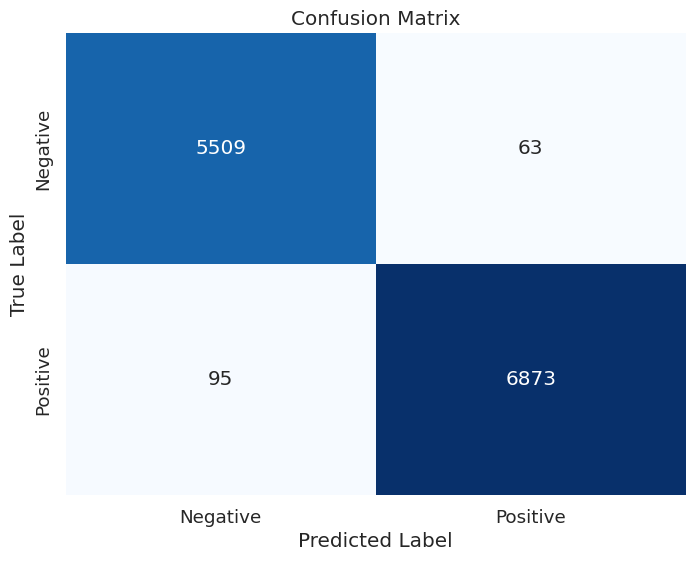

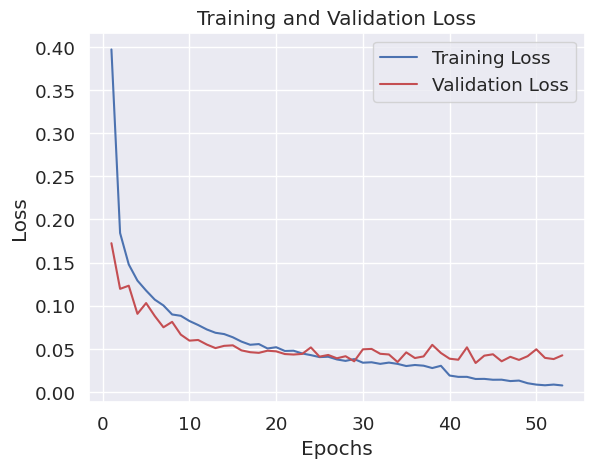

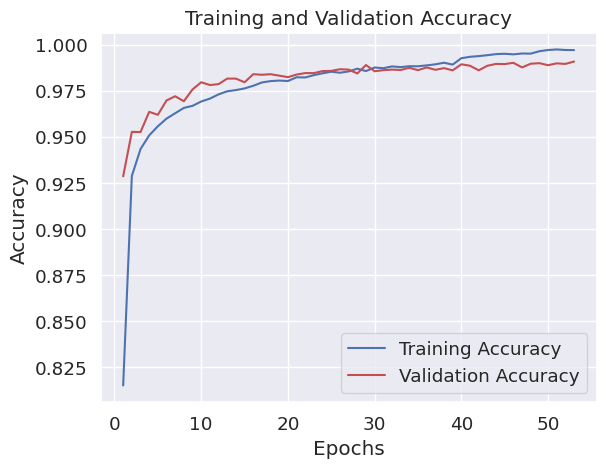

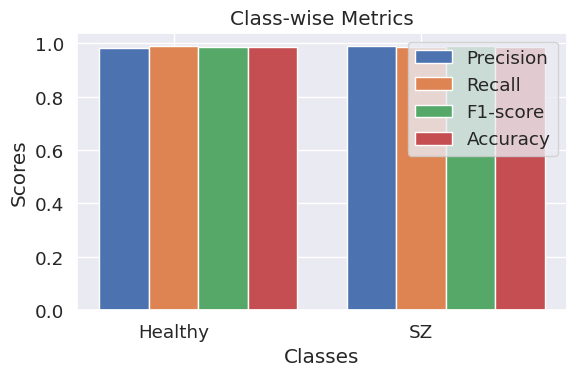

Training Accuracy: 99.70%
Validation Accuracy: 99.08%
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9863 - loss: 0.0399
Testing Accuracy: 98.74%
Precision: 99.09%
Recall: 98.64%
F1-Score: 98.86%


In [16]:
def plot_class_wise_metric(classes, y_test, y_pred_classes):
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average=None)
    accuracy = accuracy_score(y_test, y_pred_classes)
    class_labels = ['Healthy', 'SZ']

    # Define metrics to plot
    metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
    classwise_metrics = [precision, recall, f1_score, [accuracy] * len(precision)]

    # Plot bar graph
    fig, ax = plt.subplots(figsize=(6, 4))

    index = np.arange(len(class_labels))
    bar_width = 0.2
    opacity = 0.8

    for i, metric in enumerate(metrics):
        ax.bar(index + i * bar_width, classwise_metrics[i], bar_width, label=metric)

    ax.set_xlabel('Classes')
    ax.set_ylabel('Scores')
    ax.set_title('Class-wise Metrics')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(class_labels)
    ax.legend()

    plt.tight_layout()
    plt.savefig(f'{classes}_rimli_bar_graph.png')
    plt.show()

def plot_loss_curve(history, classes):
    # Access loss and accuracy from training history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    # Plot loss vs epoch
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'{classes}_rimli_loss_curve.png')
    plt.show()

    # Plot accuracy vs epoch
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'{classes}_rimli_accuracy.png')
    plt.show()

def plot_confusion_matrix(y_test, y_pred_classes):
    cm = confusion_matrix(y_test, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set_theme(font_scale=1.2)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'], cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def metric_values(model, y_pred_classes, X_test, y_test):
    accuracy = model.evaluate(X_test, y_test)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='weighted')
    print("Accuracy:", accuracy*100, "%")
    print("Precision:", precision*100, "%")
    print("Recall:", recall*100, "%")
    print("F1-score:", f1_score*100, "%")

# Model evaluation 
def evaluate_model(X_train, y_train, X_test, y_test, input_shape, epochs=100, batch_size=64):
    # Normalize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

    # Create and train the model
    model = ProposedModelFramework(2, input_shape)
    history = model.train(X_train, y_train, epochs, batch_size, validation_split=0.2)

    # Evaluate on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int).flatten()

    # Metrics and plots
    plot_confusion_matrix(y_test, y_pred_classes)
    plot_loss_curve(history, "Healthy vs Schizophrenic")
    plot_class_wise_metric("Healthy vs Schizophrenic", y_test, y_pred_classes)

    # Training and validation accuracy from history
    train_accuracy = history.history['accuracy'][-1]  # Last epoch's training accuracy
    val_accuracy = history.history['val_accuracy'][-1]  # Last epoch's validation accuracy

    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

    # Evaluate model on test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

    # Calculate precision, recall, and F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='binary')
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-Score: {f1_score * 100:.2f}%")

# Perform model evaluation once
input_shape = (X_train.shape[1], X_train.shape[2])
epochs = 100
batch_size = 64
evaluate_model(X_train, y_train, X_test, y_test, input_shape, epochs, batch_size)


**TEMPORAL ATTENTION**

In [19]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Layer, Reshape, Activation, Bidirectional, GRU, PReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2

class TemporalAttention(tf.keras.layers.Layer):
    def __init__(self, filters, **kwargs):
        super(TemporalAttention, self).__init__(**kwargs)
        self.filters = filters

    def build(self, input_shape):
        feature_dim = input_shape[-1]  # Get the feature dimension dynamically
        self.dense1 = tf.keras.layers.Dense(feature_dim, activation='tanh')
        self.dense2 = tf.keras.layers.Dense(feature_dim, activation='sigmoid')

    def call(self, inputs):
        tanh_out = self.dense1(inputs)  # (None, time_steps, feature_dim)
        sigmoid_out = self.dense2(inputs)  # (None, time_steps, feature_dim)
        attention_weights = tanh_out * sigmoid_out  # Ensure same shape as inputs
        return inputs * attention_weights  # Element-wise multiplication

    def compute_output_shape(self, input_shape):
        return input_shape  # The output shape is the same as the input shape

# Define Model Framework
class ProposedModelFramework:
    def __init__(self, classes, input_shape):
        self.classes = classes
        self.input_shape = (input_shape[0], input_shape[1], 1)  # Add channel dimension
        self.model = Sequential()

        # CNN layers with PReLU activation
        self.model.add(Conv2D(32, (3, 1), input_shape=self.input_shape))
        self.model.add(PReLU())
        self.model.add(Conv2D(32, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))
        self.model.add(Dropout(0.3))
        
        self.model.add(Conv2D(64, (3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(64, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))
        self.model.add(Dropout(0.3))

        self.model.add(Conv2D(128, (3, 1)))
        self.model.add(PReLU())
        self.model.add(Conv2D(128, (3, 1)))
        self.model.add(PReLU())
        self.model.add(MaxPooling2D((2, 1)))

        # Flatten layer to prepare for BiGRU
        self.model.add(Flatten())
        # Reshape to fit BiGRU input shape
        self.model.add(Reshape((-1, 128)))

        # Apply BiGRU layer before Temporal Attention
        self.model.add(Bidirectional(GRU(128, return_sequences=True)))
        
        # Apply Temporal Attention
        self.model.add(TemporalAttention(filters=128))
        
        # Flatten before Dense layers
        self.model.add(Flatten())

        # Dense layers with PReLU activation
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(128))
        self.model.add(PReLU())
        self.model.add(Dense(256))
        self.model.add(PReLU())
        self.model.add(Dropout(0.5))

        # Final Classification Layer
        self.model.add(Dense(1, activation='sigmoid'))

    def train(self, X_train, y_train, epochs, batch_size, validation_split):
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
        history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                 validation_split=validation_split, callbacks=[early_stopping, lr_scheduler])
        return history

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

    def display_summary(self):
        print("\nModel Summary:")
        self.model.summary()

# Example Usage 
input_shape = (X_train.shape[1], X_train.shape[2])  # Define shape
model = ProposedModelFramework(classes=1, input_shape=input_shape)
model.display_summary()



Model Summary:


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_82 (Conv2D)                   │ (None, 115, 1, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_130 (PReLU)                  │ (None, 115, 1, 32)          │           3,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 113, 1, 32)          │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_131 (PReLU)                  │ (None, 113, 1, 32)          │           3,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 56, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 56, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 54, 1, 64)           │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_132 (PReLU)                  │ (None, 54, 1, 64)           │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_85 (Conv2D)                   │ (None, 52, 1, 64)           │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_133 (PReLU)                  │ (None, 52, 1, 64)           │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 26, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 26, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_86 (Conv2D)                   │ (None, 24, 1, 128)          │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_134 (PReLU)                  │ (None, 24, 1, 128)          │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_87 (Conv2D)                   │ (None, 22, 1, 128)          │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_135 (PReLU)                  │ (None, 22, 1, 128)          │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 11, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_26 (Flatten)                 │ (None, 1408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_29 (Reshape)                 │ (None, 11, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_13 (Bidirectional)     │ (None, 11, 256)             │         198,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ temporal_attention_1                 │ (None, 11, 256)             │               0 │
│ (TemporalAttention)                  │                             │              

 Total params: 741,409 (2.83 MB)

 Trainable params: 741,409 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.6969 - loss: 0.5445 - val_accuracy: 0.9108 - val_loss: 0.2203 - learning_rate: 0.0010
Epoch 2/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9147 - loss: 0.2149 - val_accuracy: 0.9440 - val_loss: 0.1410 - learning_rate: 0.0010
Epoch 3/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9361 - loss: 0.1645 - val_accuracy: 0.9535 - val_loss: 0.1186 - learning_rate: 0.0010
Epoch 4/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9454 - loss: 0.1408 - val_accuracy: 0.9587 - val_loss: 0.1074 - learning_rate: 0.0010
Epoch 5/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9544 - loss: 0.1236 - val_accuracy: 0.9612 - val_loss: 0.1099 - learning_rate: 0.0010
Epoch 6/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9547 - loss: 0.1164 - val_accuracy: 0.9677 - val_loss: 0.0825 - learning_rate: 0.0010
Epoch 7/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9602 - 

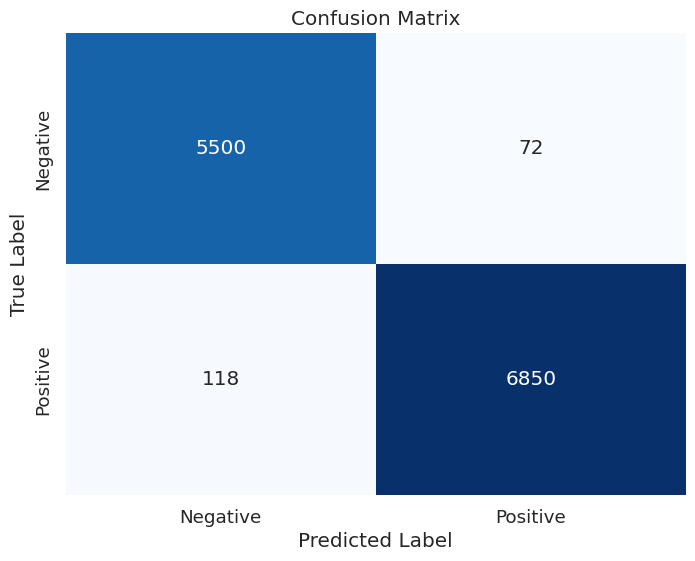

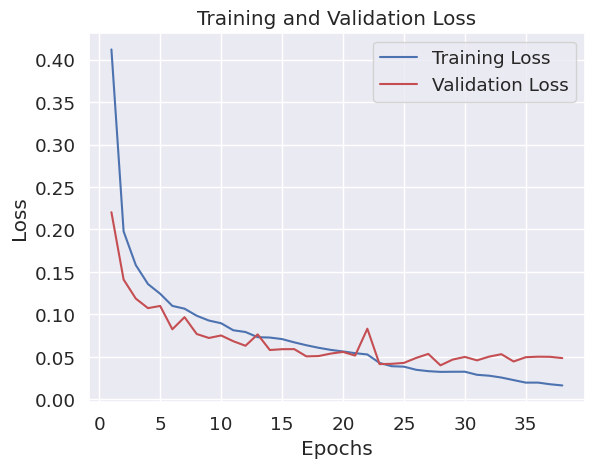

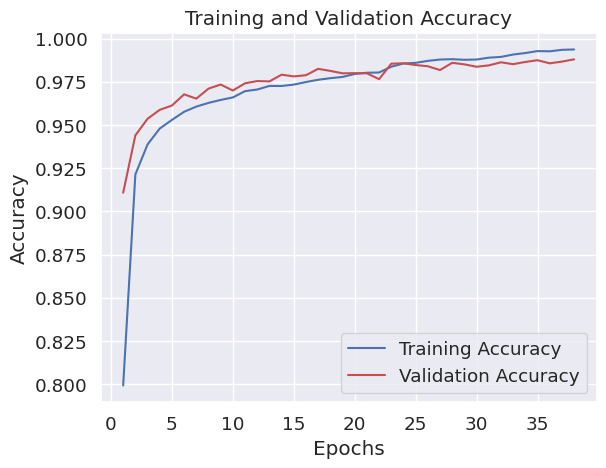

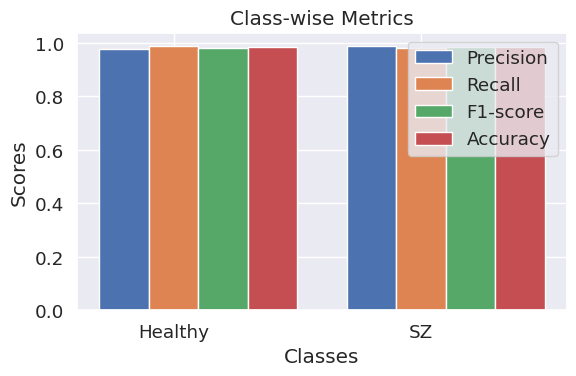

Training Accuracy: 99.37%
Validation Accuracy: 98.79%
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9843 - loss: 0.0418
Testing Accuracy: 98.48%
Precision: 98.96%
Recall: 98.31%
F1-Score: 98.63%


In [20]:
def plot_class_wise_metric(classes, y_test, y_pred_classes):
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average=None)
    accuracy = accuracy_score(y_test, y_pred_classes)
    class_labels = ['Healthy', 'SZ']

    # Define metrics to plot
    metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
    classwise_metrics = [precision, recall, f1_score, [accuracy] * len(precision)]

    # Plot bar graph
    fig, ax = plt.subplots(figsize=(6, 4))

    index = np.arange(len(class_labels))
    bar_width = 0.2
    opacity = 0.8

    for i, metric in enumerate(metrics):
        ax.bar(index + i * bar_width, classwise_metrics[i], bar_width, label=metric)

    ax.set_xlabel('Classes')
    ax.set_ylabel('Scores')
    ax.set_title('Class-wise Metrics')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(class_labels)
    ax.legend()

    plt.tight_layout()
    plt.savefig(f'{classes}_rimli_bar_graph.png')
    plt.show()

def plot_loss_curve(history, classes):
    # Access loss and accuracy from training history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    # Plot loss vs epoch
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'{classes}_rimli_loss_curve.png')
    plt.show()

    # Plot accuracy vs epoch
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'{classes}_rimli_accuracy.png')
    plt.show()

def plot_confusion_matrix(y_test, y_pred_classes):
    cm = confusion_matrix(y_test, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set_theme(font_scale=1.2)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'], cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def metric_values(model, y_pred_classes, X_test, y_test):
    accuracy = model.evaluate(X_test, y_test)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='weighted')
    print("Accuracy:", accuracy*100, "%")
    print("Precision:", precision*100, "%")
    print("Recall:", recall*100, "%")
    print("F1-score:", f1_score*100, "%")

# Model evaluation 
def evaluate_model(X_train, y_train, X_test, y_test, input_shape, epochs=100, batch_size=64):
    # Normalize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

    # Create and train the model
    model = ProposedModelFramework(2, input_shape)
    history = model.train(X_train, y_train, epochs, batch_size, validation_split=0.2)

    # Evaluate on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int).flatten()

    # Metrics and plots
    plot_confusion_matrix(y_test, y_pred_classes)
    plot_loss_curve(history, "Healthy vs Schizophrenic")
    plot_class_wise_metric("Healthy vs Schizophrenic", y_test, y_pred_classes)

    # Training and validation accuracy from history
    train_accuracy = history.history['accuracy'][-1]  # Last epoch's training accuracy
    val_accuracy = history.history['val_accuracy'][-1]  # Last epoch's validation accuracy

    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

    # Evaluate model on test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

    # Calculate precision, recall, and F1-score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='binary')
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-Score: {f1_score * 100:.2f}%")

# Perform model evaluation once
input_shape = (X_train.shape[1], X_train.shape[2])
epochs = 100
batch_size = 64
evaluate_model(X_train, y_train, X_test, y_test, input_shape, epochs, batch_size)
